## 7. Algorithmic Question
Leonardo is an intern at a company. He is paid based on the total number of hours he has worked. They agreed d days ago that Leonardo could not work less than "mintime" or more than "maxtime" hours per i-th day. Furthermore, he was warned by HR that on his last day at the company, he should provide a detailed report on how many hours he worked each day for the previous d days.

Today is the day Leonardo should report to HR, but the problem is that he didn't account for how many hours he put in for each day, so he only has the total sum of the hours (sumHours) he put in total in these d days. He believes that if he creates a report in which each number "daysHours" corresponds to the total hours he worked on the i-th day while satisfying the HR limitations and the total sum of all "daysHours"  equals "sumHours" he would be fine.

He cannot create such a report independently and requests your assistance. He will give you the number of days "d" , total hours spent "sumHours" , and the HR limitations for each day "i"
, and he wants you to assist him in determining whether it is possible to create such a fake report. If that is possible, make such a report.

Input

The first line of input contains two integers d,  "sumHours"- the number of days Leonardo worked there and the total number of hours he worked for the company. Each of the following d lines contains two integer numbers "mintime" and "maxtime"- the minimum and maximum hours he can work on the "i"'th day.

Output

If such a report cannot be generated, print 'NO' in one output line. If such a report is possible, print 'YES' in the output and d numbers - the number of hours Leonardo spent each day - in the second line. If more than one solution exists, print any of them.

#### 1.Implement a code to solve the above mentioned problem.(**following cell is the answer**)

In [4]:
inupt_day_sumhours=input("enter the d and the sumHours: ").split()
d=int(inupt_day_sumhours[0]) #the number of days Leonardo worked
sum_hours=int(inupt_day_sumhours[1]) #the total number of hours he worked for the company

day_limits=list() #creating a list of minimums and maximums of each day he workd
for i in range(d):
    inupt_min_max =input(f"enter the min and max Hours for {i + 1}'th' day : ").split()
    inupt_min=int(inupt_min_max[0])
    inupt_max=int(inupt_min_max[1])
    day_limits.append(([] if inupt_min == 0 else [0]) + [i for i in range(inupt_min, inupt_max + 1)])
    
results=list()
from itertools import product
all_combinations = list(product(*day_limits))
for combination in all_combinations:
    if sum(combination)==sum_hours:
        results.append(combination)
if len(results)==0:
    print("NO")
else:
    print("YES")
    for i in results:
        print(*i)

enter the d and the sumHours: 4 18
enter the min and max Hours for 1'th' day : 0 2
enter the min and max Hours for 2'th' day : 3 6
enter the min and max Hours for 3'th' day : 19 22
enter the min and max Hours for 4'th' day : 13 18
YES
0 0 0 18
0 3 0 15
0 4 0 14
0 5 0 13
1 0 0 17
1 3 0 14
1 4 0 13
2 0 0 16
2 3 0 13


##### 2.What is the time complexity (the Big O notation) of your solution? Please provide a detailed explanation of how you calculated the time complexity.
well the time complexity of my code is elaborated as below,line by line:
##### A.
the firt parsing input(the first 3 lines):Tis has a constant time complexity of O(1).because it performs a fixed number of operations regardless of the input size.
##### B.
Creating day_limits List(the next 6lines):The loop that fills the day_limits list iterates d times, and as we know the d is the number of days Leonardo worked. In each iteration, it performs a constant number of operations. Therefore, the time complexity of this part is O(d) and because days are a few it will be the same as o("a small number like=4").
##### C.
Generating All Combinations of the given intervals: we are using the product function from the itertools module to generate all combinations of hours for each day. The number of combinations is tied to the number of options for each day. In the worst case scenario, this results in a total of (max-min+1)^d combinations. The time complexity of generating all combinations is O((max-min+1)^d), where max and min are the maximum and minimum hours for a day, respectively.
##### D.
Checking Combinations and Printing Results: The loop that iterates over all combinations to check if the sum of each combination tuple is equal to sum_hours has a time complexity of O((max-min+1)^d) since it loops through all combinations.
Printing the results has a time complexity proportional to the number of results, which can be at most O((max-min+1)^d) in the worst case scenario.

##### 3.Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Compare your answer to theirs. Do you believe this is correct? If the two differ, which one is right? (why?)
yes.consistence with what i said, the time complexity in the worst case scenario is O((max-min+1)^d) which chatGpt is also mentioned.

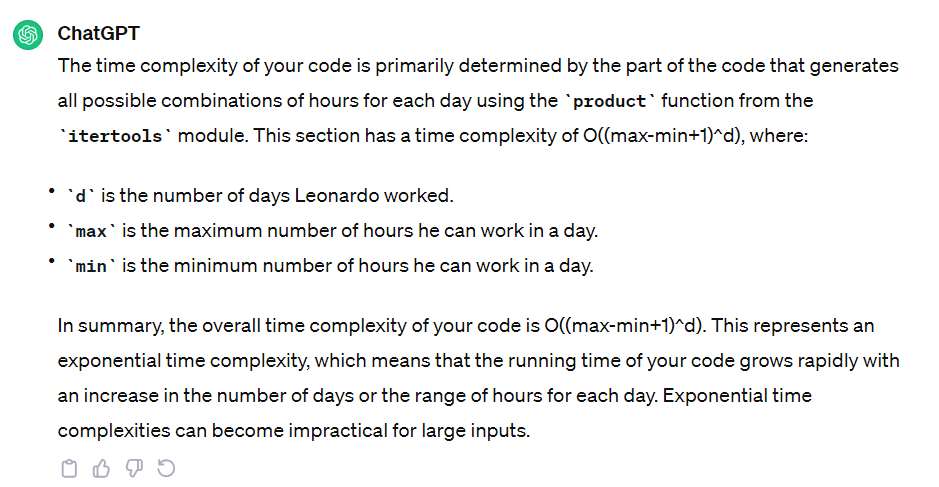

#### 4.What do you think of the optimality of your code? Do you believe it is optimal? Can you improve? Please elaborate on your response.

regarding the optimality of my code, it can be optimal just for a few entered days(d).Due to the fact that it has an exponential time complexity, it is not optimal for big numbers of "d". Let me elaborate on my response: at the very first attempts, i decided to do this assignment with many different loops to get the answer. but my code had problems in its algorithm which just checked two successive days and it was not correct.then I googled my question to see how I could go through a list of some tuples to find the SumHour out of each element of these nested tuples in an optimal way. I figured out that this problem should be resolved by implementing a Greedy Algorithm... I searched about it and got into its functionality. Afterward, using the Greedy algorithm, I came up with an algorithm that worked But just printed out one soulution and also i was not worked for all inputs and as it was mentioned in the question,the code has to print all the possible solutions to this problem and not just one solution.ultimately,i came up with this algorithm which can be turned into a more optimal by using greedy and recursive form of algorithms at the same time to generate the right report and print all the possible outcomes but it is not working for some inputs.. i just mention it but i still believe on my algorithm for thorough and correct answer than this one which i wrote by the help of CHatGPT.

In [1]:
# grabing the Inputs:
inupt_day_sumhours=input("enter the d and eh sumHours: ").split()
d=int(inupt_day_sumhours[0]) #the number of days Leonardo worked
sum_hours=int(inupt_day_sumhours[1]) #the total number of hours he worked for the company

day_limits=list() #creating a list of minimums and maximums of each day he workd
for i in range(d):
    inupt_min_max = input(f"enter the min and max Hours for {i + 1}'th' day : ").split()
    inupt_min=int(inupt_min_max[0])
    inupt_max=int(inupt_min_max[1])
    day_limits.append([inupt_min,inupt_max])
#if i want to print all the possible outcomes, then i have to create a function
# to call it again and again which is called recursive function
def generate_all_reports(d, sum_hours, day_limits, temporary_report=None, index=0):
    #first it is needed to chech whether this is the first report or not
    #if it is the first one, we should create a report list
    if temporary_report is None:
        temporary_report = [0] * d
    #we need to chech wether we get to the last day to terminate our recursive report generationg process
    if index == d:
        if sum(temporary_report) == sum_hours: #here all the temporary lists which have our
            return [temporary_report.copy()]   #condition is being seperated for the final result
        else:
            return []

    #this block of code is the recursive generation of all valid reports. It explores different
    #combinations of hours for the current day and recursively explores all possible outcomes for the remaining
    #days. The results are piled up in the reports list, which is then returned.
    reports = list()
    for hours in range(day_limits[index][0], min(day_limits[index][1] + 1, sum_hours - sum(temporary_report) + 1)):
        temporary_report[index] = hours
        remaining_reports = generate_all_reports(d, sum_hours, day_limits, temporary_report.copy(), index + 1)
        reports.extend(remaining_reports)
    return reports

#here we call our functioon
all_reports = generate_all_reports(d, sum_hours, day_limits)
#and last nut not least😂, we print ou final result
if not all_reports:
    print("NO")
else:
    print("YES")
    for report in all_reports:
        print(*report)

enter the d and eh sumHours: 3 17
enter the min and max Hours for 1'th' day : 0 2
enter the min and max Hours for 2'th' day : 3 6
enter the min and max Hours for 3'th' day : 5 15
YES
0 3 14
0 4 13
0 5 12
0 6 11
1 3 13
1 4 12
1 5 11
1 6 10
2 3 12
2 4 11
2 5 10
2 6 9
